# Data visualization for extracted features

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew

Load CSV and drop non numeric columns

In [65]:
df = pd.read_csv('data/features_difficulty_merged.csv')
df = df.drop(columns=['file'])


## Get information about the data

In [66]:
print(df.describe())
print("Number of rows", len(df))

       difficulty  average_tempo  average_bpm    note_count    tick_count  \
count  264.000000   2.640000e+02   264.000000    264.000000  2.640000e+02   
mean     2.653409   5.704848e+05   116.239436   4833.428030  2.331094e+05   
std      1.209966   2.288721e+05    32.136605   5879.286619  3.038831e+05   
min      1.000000   2.418231e+05    31.000113    218.000000  1.680000e+03   
25%      1.500000   4.779707e+05   100.000000    764.750000  3.532800e+04   
50%      2.500000   5.000000e+05   120.000000   3361.000000  9.497200e+04   
75%      3.500000   6.000000e+05   125.530697   7185.250000  2.954860e+05   
max      5.000000   1.935477e+06   248.115244  66008.000000  1.593600e+06   

       note_density  tempo_deviation  unique_note_count  total_duration  \
count    264.000000       264.000000         264.000000    2.640000e+02   
mean       0.040546     90629.094967          49.465909    9.422120e+05   
std        0.049596    145762.436709          16.403386    1.626710e+06   
min   

Get correlation

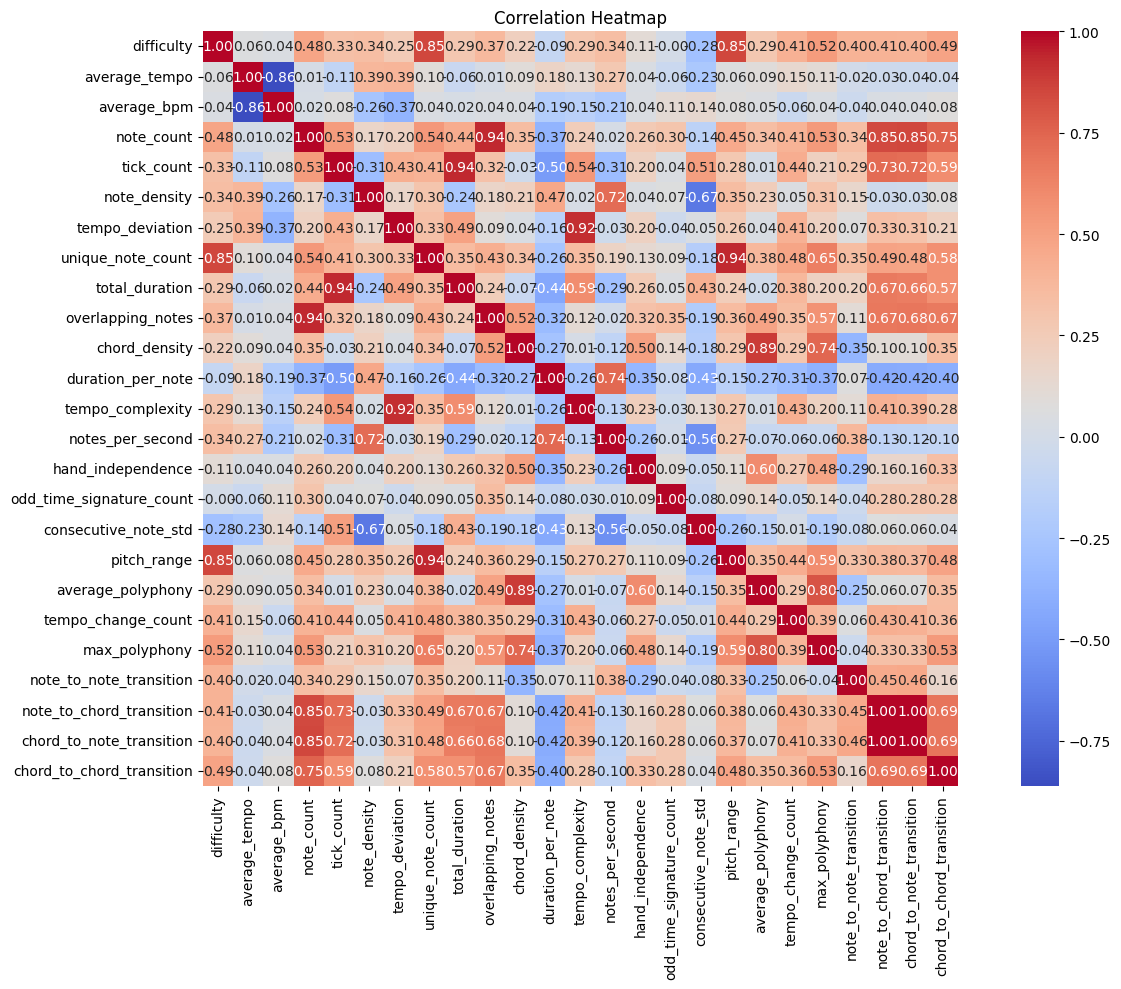

In [67]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

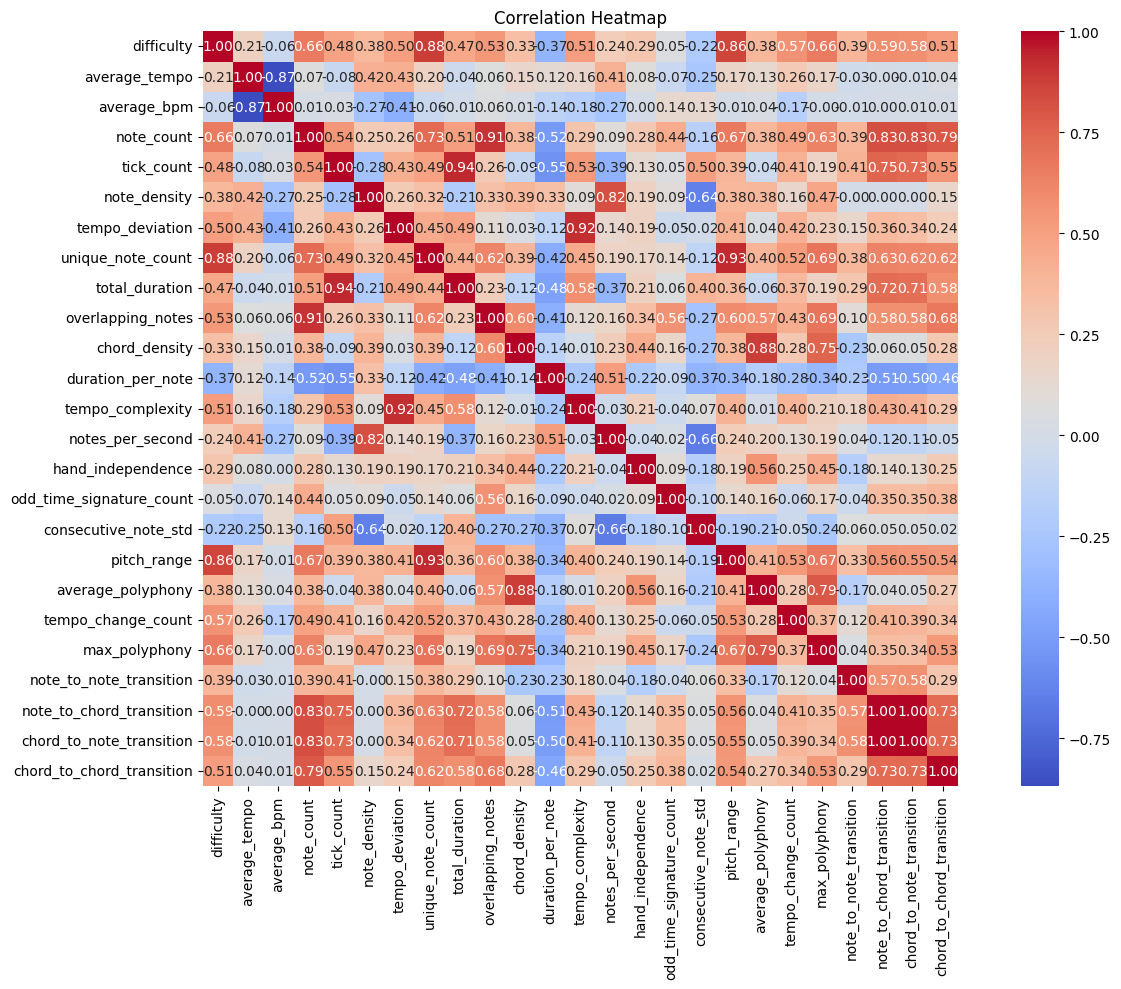

In [ ]:
plt.figure(figsize=(14, 10))
high_difficulty_df = df[df['difficulty'] > 4]
sns.heatmap(high_difficulty_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##  Get distribution of difficulty

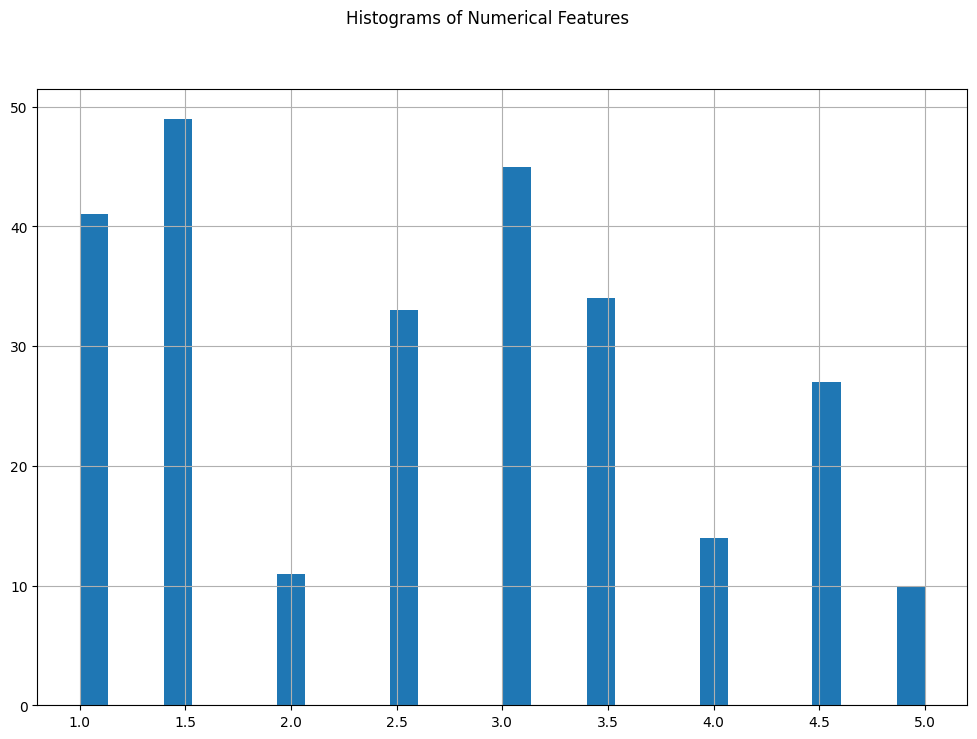

In [68]:
df['difficulty'].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Graph  features with highest correlation against difficulty

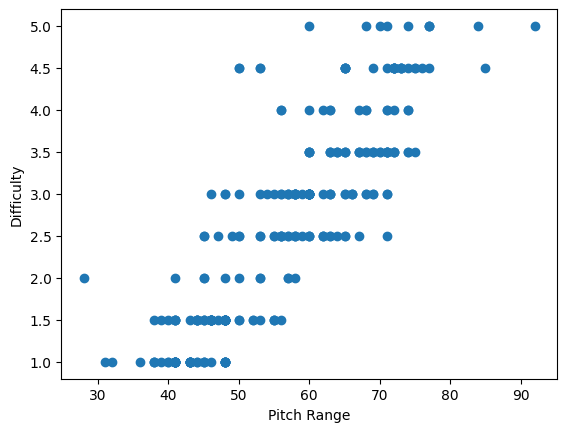

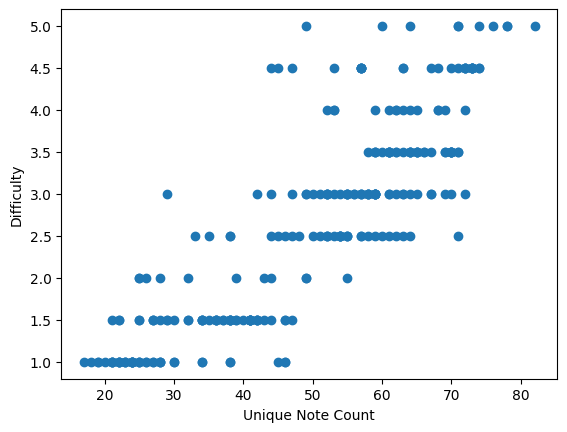

In [69]:
fig,ax = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['pitch_range'])
plt.ylabel('Difficulty')
plt.xlabel('Pitch Range')
plt.show()

fig,ax  = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['unique_note_count'])
plt.ylabel('Difficulty')
plt.xlabel('Unique Note Count')
plt.show()

### Deleting outliers

Here, I used to delete outliers, but leaving them in the data yields better results for the model. To be investivated.

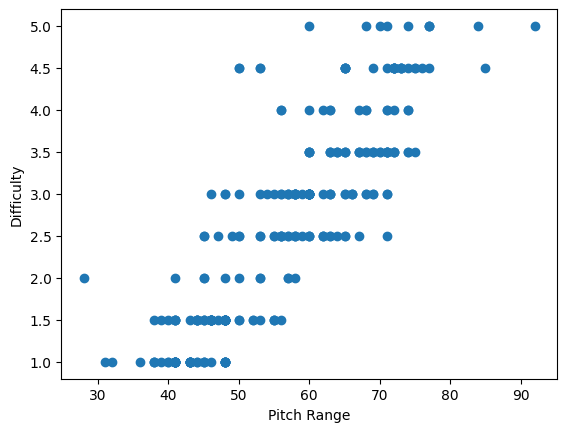

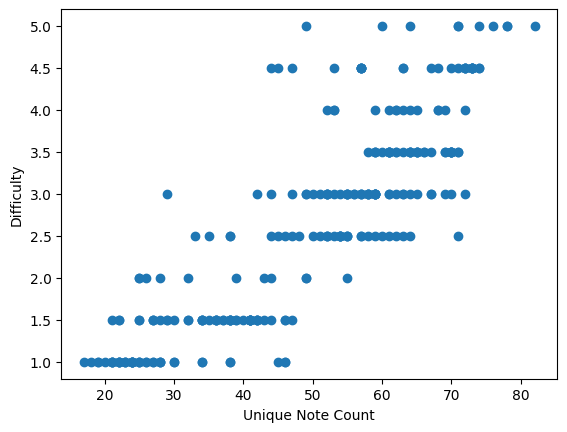

In [70]:
# Graph again

fig,ax = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['pitch_range'])
plt.ylabel('Difficulty')
plt.xlabel('Pitch Range')
plt.show()

fig,ax  = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['unique_note_count'])
plt.ylabel('Difficulty')
plt.xlabel('Unique Note Count')
plt.show()

## Graphing all data against difficulty

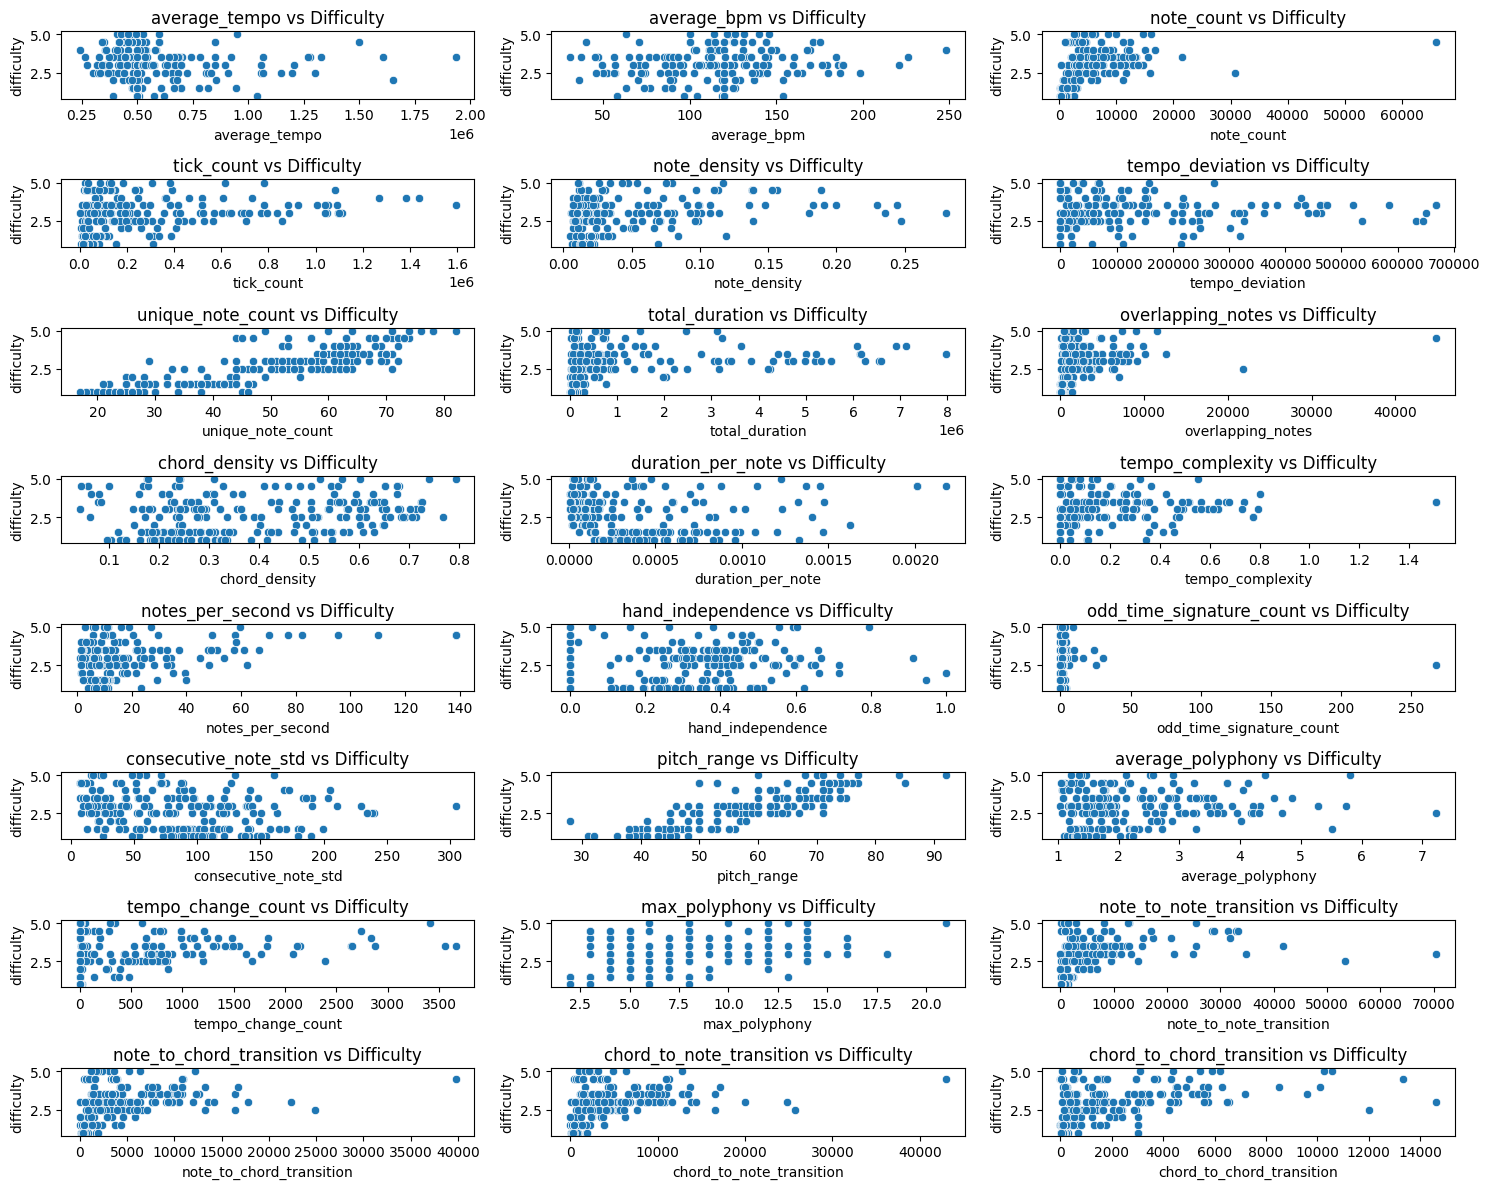

In [71]:
features = df.drop(columns=['difficulty']).columns

# Create subplots
num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=df, x=feature, y='difficulty')
    plt.title(f'{feature} vs Difficulty')
    plt.tight_layout()

plt.show()

## Extract processed data to a new csv

In [72]:
df.to_csv('data/processed.csv', index=False)